# Исследование объявлений о продаже квартир

Предоставлены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Разделим нашу работу на несколько этапов:

1. Получение общей информации из исходного файла.

2. Предобработка данных.

3. Добавляем значения в таблицу.

4. Ответы на поставленные вопросы.

5. Общий вывод

### Шаг 1. Получение общей информации из исходного файла

In [1426]:
import pandas as pd
from matplotlib import pyplot as plt
import math

In [1427]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [1428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [1429]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [1430]:
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12311,20,2360000.0,48.5,2018-07-17T00:00:00,2,2.50,3.0,26.6,2,NaN,...,10.4,1.0,посёлок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,276.0
8624,9,6670000.0,54.3,2018-12-28T00:00:00,2,2.80,25.0,32.2,21,NaN,...,9.0,NaN,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,89.0
8509,12,4100000.0,49.4,2017-09-12T00:00:00,4,2.55,5.0,37.3,2,NaN,...,5.3,0.0,Санкт-Петербург,14663.0,13459.0,1.0,549.0,2.0,406.0,41.0
4278,5,6300000.0,54.6,2018-11-26T00:00:00,2,NaN,14.0,NaN,14,NaN,...,NaN,NaN,Санкт-Петербург,28507.0,7447.0,1.0,451.0,2.0,282.0,70.0
11681,7,4800000.0,39.0,2016-05-26T00:00:00,1,2.70,5.0,15.0,5,False,...,10.0,1.0,Пушкин,17907.0,30060.0,1.0,235.0,1.0,232.0,117.0


### Вывод

Всего в таблице 22 столбца:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²* )
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

Есть столбцы с пропущенными значениями. Также присутствуют столбцы со значениями типа float когда хватает целочисленного int, например стобец *rooms* или *floor*

### Шаг 2. Предобработка данных

Много пропущенных значений в столбце *is_apartment*, прямой связи с другими столбцами не наблюдается, удалять их не будем.
Все кваритры с пропущенным значением *floors_total* имеют пропущенное значение *is_apartment*

Предполагаем, что если значние пропущено в *parks_around3000*, *ponds_around3000*, *balcony*, то скорее всего их нет(парков и водоёмов), заменим на 0, в дальнейшем анализе эти столбцы нам не нужны. 
    Предполагаем, что если значение пропущено в *days_exposition*, значит объявление актуально на момент формирования таблицы, но учитывать их не будем.
    
Пропущенные значения в столбцах *floors_total*, *days_exposition*, *cityCenters_nearest* считаем за технические ошибки, заполним пропуски на -1, в последствии будем фильтровать таблицу по значениям > 0. 
    

In [1431]:
no_mean = ['parks_around3000', 'ponds_around3000', 'balcony']
err = ['floors_total', 'days_exposition', 'cityCenters_nearest']

df[no_mean] = df[no_mean].fillna(0)
df[err] = df[err].fillna(-1)

Столбцы из column_0 заменим на 0 предполагая отсутствие значения в действительности.
Столбцы из сolumn_1 заменим на -1 для корректной замены типа данных на int64 в последствии. В дальнейшей работа будем фильтровать эти значения.

In [1432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Преобразуем столбцы *last_price*, *floors_total*, *balcony*, *cityCenters_nearest*, *parks_around3000*,*ponds_around3000*, *parks_nearest*, *ponds_nearest*, *days_exposition*, *leas_price*, *total_area* в целочисленный тип int64 для оптимизации памяти.
Столбец *first_day_exposition* преобразуем в формат datetime.

In [1433]:
df[no_mean] = df[no_mean].astype('int64')
df[err] = df[err].astype('int64')
df['last_price'] = df['last_price'].astype('int64')
df['total_area'] = df['total_area'].astype('int64')


df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null int64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around3000   

In [1434]:
df[df.duplicated()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Дупликатов не наблюдаем.

### Вывод:

Предполагаем, что отстуствие значений в столбцах *balcony*, *ponds_around3000*, *parks_around3000* говорит об отсутсвии этих значений в действительности, то есть на самом деле значения должны быть нулевыми. 
Также предлоположили, что значения в столбцах *ceiling_height* отсутствуют т.к. пользователь не смог произвести соответствующее измерение, в дальнейшем будем фильтровать таблицу.
В столбцах *living_area*, *kitchen_area* могут быть пропущены значения ввиду отсутвия как таковых гостинных и кухонь. Например для однокомнатных квартир или апартаментов.

### Шаг 3. Добавляем значения в таблицу.

Добавим в таблицу стоимость квадратного метра.

In [1435]:
df['cost_per_metr'] = df['last_price'] / df['total_area']
df['cost_per_metr']

0        120370.370370
1         83750.000000
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72932.330827
23695     52542.372881
23696     44642.857143
23697    150986.842105
23698     42187.500000
Name: cost_per_metr, Length: 23699, dtype: float64

Добавим в таблицу день, месяц и год публикации объявления.

In [1436]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

Добавим в таблицу процент площади кухни и гостинной от общей площади квартиры.

In [1437]:
df['living_per_total'] = df['living_area'] / df['total_area']
df['kitchen_per_total'] = df['kitchen_area'] / df['total_area']

In [1438]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_metr,weekday,month,year,living_per_total,kitchen_per_total
0,20,13000000,108,2019-03-07,3,2.70,16,51.0,8,NaN,...,482.0,2,755.0,-1,120370.370370,3,3,2019,0.472222,0.231481
1,7,3350000,40,2018-12-04,1,NaN,11,18.6,1,NaN,...,NaN,0,NaN,81,83750.000000,1,12,2018,0.465000,0.275000
2,10,5196000,56,2015-08-20,2,NaN,5,34.3,4,NaN,...,90.0,2,574.0,558,92785.714286,3,8,2015,0.612500,0.148214
3,0,64900000,159,2015-07-24,3,NaN,14,NaN,9,NaN,...,84.0,3,234.0,424,408176.100629,4,7,2015,NaN,NaN
4,2,10000000,100,2018-06-19,2,3.03,14,32.0,13,NaN,...,112.0,1,48.0,121,100000.000000,1,6,2018,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133,2017-03-21,3,3.70,5,73.3,3,NaN,...,796.0,3,381.0,-1,72932.330827,1,3,2017,0.551128,0.103985
23695,14,3100000,59,2018-01-15,3,NaN,5,38.0,4,NaN,...,NaN,0,NaN,45,52542.372881,0,1,2018,0.644068,0.144068
23696,18,2500000,56,2018-02-11,2,NaN,3,29.7,1,NaN,...,NaN,0,NaN,-1,44642.857143,6,2,2018,0.530357,NaN
23697,13,11475000,76,2017-03-28,2,3.00,17,NaN,12,NaN,...,173.0,3,196.0,602,150986.842105,1,3,2017,NaN,0.306579


### Шаг 4. Ответы на поставленные вопросы.

### Задача:
### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
    

#### Рассмотрим столбец *total_area*

In [1439]:
df['total_area'].describe()

count    23699.000000
mean        60.120511
std         35.665822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

По исходным данным имеем:
Среднее значение площади - 60 кв. метров.
Медиана - 52кв. метров.

В столбце *total_area* заметим, что 3 квартиль на уровне 70 квадратных метров, а максимальное значение составляет 900 кв. метров. Изучим подробнее эту строку.

In [1440]:
df.query('total_area == 900')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_metr,weekday,month,year,living_per_total,kitchen_per_total
19540,8,420000000,900,2017-12-06,12,2.8,25,409.7,25,NaN,...,NaN,2,318.0,106,466666.666667,2,12,2017,0.455222,0.124444


Похоже на реальную квартиру, она даёт очень длинный хвост в гистограмме по total_area, но удалив ее мы бы исказили данные.

Text(0.5, 0, 'total area')

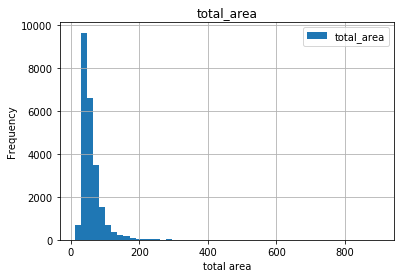

In [1441]:
ax = df.plot(y='total_area', kind='hist', title='total_area', bins=50, grid=True)

ax.set_xlabel('total area')

Видим распределение с пиком в значении 52 кв. метров и длинным хвостом из-за квартиры с 900 кв. метрами. Квартир с площадью более 200 кв. очень мало.

#### Рассмотрим столбец *last_price*

In [1442]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

По исходным данным имеем:

Среднее значение цены - 7 630 000 у.е.
Медиана - 4 650 000 у.е.

Обратим внимание, что максимальная цена более чем в 100 раз выше, чем стоимость квартиры из 3 квартили.

Text(0.5, 0, 'Price')

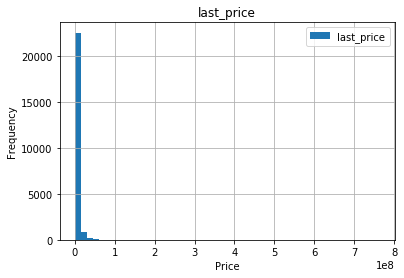

In [1443]:
ax = df.plot(y='last_price', kind='hist', title='last_price', bins=50, range=(1.219000e+04, 7.630000e+08), grid=True)
ax.set_xlabel('Price')

Для наглядности рассмотрим более плотную область.

Text(0.5, 0, 'Price')

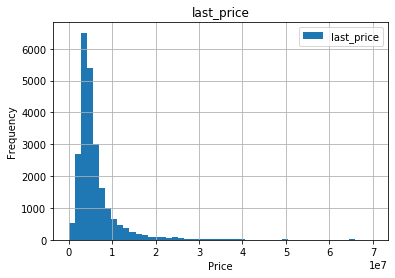

In [1444]:
ax = df.plot(y='last_price', kind='hist', title='last_price', bins=50, range=(0, 7e07), grid=True)
ax.set_xlabel('Price')

Судя по графику, квартир стоимостью более 20 000 000 очень мало.

#### Рассмотрим столбец *rooms*

In [1445]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

По исходным данным имеем:

Среднее значение количества комнат - 2 комнаты

Обратим внимание на аномальное минимальное значение. В таблице есть квартиры с 0 комнат. Рассмотрим их подробнее.

In [1446]:
df.query('rooms==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_metr,weekday,month,year,living_per_total,kitchen_per_total
144,1,2450000,27,2017-03-30,0,NaN,24,15.50,2,NaN,...,NaN,0,NaN,181,90740.740741,3,3,2017,0.574074,NaN
349,4,2320000,25,2017-09-27,0,NaN,14,17.00,1,NaN,...,NaN,0,NaN,45,92800.000000,2,9,2017,0.680000,NaN
440,8,2480000,27,2018-03-12,0,NaN,17,24.75,4,NaN,...,NaN,2,982.0,64,91851.851852,0,3,2018,0.916667,NaN
508,0,3375000,34,2017-03-28,0,NaN,26,24.30,19,NaN,...,NaN,1,593.0,430,99264.705882,1,3,2017,0.714706,NaN
608,2,1850000,25,2019-02-20,0,NaN,10,NaN,7,NaN,...,NaN,0,NaN,29,74000.000000,2,2,2019,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26,2017-09-01,0,NaN,25,18.00,16,NaN,...,NaN,1,623.0,14,123076.923077,4,9,2017,0.692308,NaN
23442,0,2500000,27,2017-09-28,0,NaN,24,18.00,4,NaN,...,NaN,0,NaN,4,92592.592593,3,9,2017,0.666667,NaN
23554,15,3350000,26,2018-09-07,0,NaN,19,NaN,8,NaN,...,NaN,2,112.0,31,128846.153846,4,9,2018,NaN,NaN
23592,10,1450000,29,2017-11-11,0,NaN,9,18.00,8,NaN,...,NaN,0,NaN,82,50000.000000,5,11,2017,0.620690,NaN


Фото есть, площадь есть, а комнат нет. Предположим, что это техническая ошибка.

Text(0.5, 0, 'Rooms')

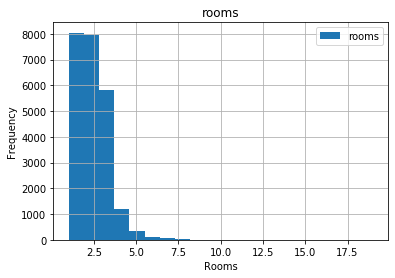

In [1447]:
ax = df[df['rooms'] > 0].plot(y='rooms', kind='hist', title='rooms', bins=20, grid=True)
ax.set_xlabel('Rooms')

Видно, что количество 1 комнатных и 2 комнатных квартир на рынке схоже. Квартир с 5 и более комнатами очень мало.

#### Рассмотрим столбец *ceiling_height*

In [1448]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

По исходным данным имеем:

Среднее значение высоты - 2.77 м.
Медиана - 2.65 м.

Обратим внимание на аномальное минимальное и максимальное значение. Считаем, что нормальная высота потолка от 2 до 6.

Text(0.5, 0, 'Ceiling height')

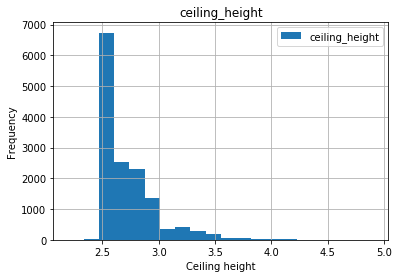

In [1449]:
ax =df[(df['ceiling_height'] > 2) & (df['ceiling_height'] < 5)].plot(y='ceiling_height', kind='hist', title='ceiling_height', bins=20, grid=True)
ax.set_xlabel('Ceiling height')

Пик приходится на квартиры с 2.5 метровым потолком. Квартир с потолком выше 3.5 метров почти нет.

#### Построим матрицу корреляции

In [1450]:
column = ['total_area', 'last_price', 'rooms', 'ceiling_height']
df[column].corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.653654,0.758347,0.095643
last_price,0.653654,1.000000,0.363343,0.085430
rooms,0.758347,0.363343,1.000000,0.054457
ceiling_height,0.095643,0.085430,0.054457,1.000000


Наблюдаем высокую положительную корреляцию между площадью и ценой, между площадью и количеством комнат. Очевидные вещи говорят о том, что с данными всё в порядке.
Можем обратить внимание на то, что цена квартиры и высота потолков коррелируют слабо.

### Итог:

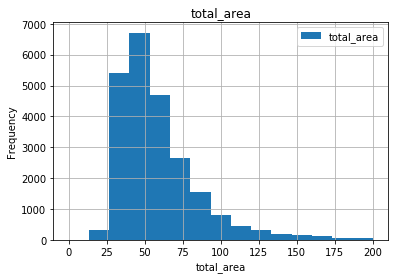

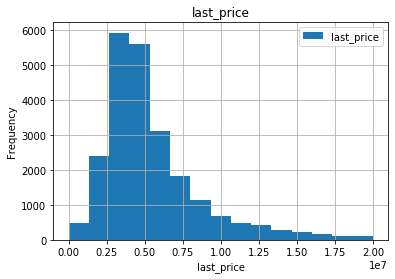

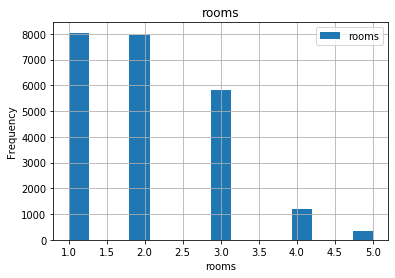

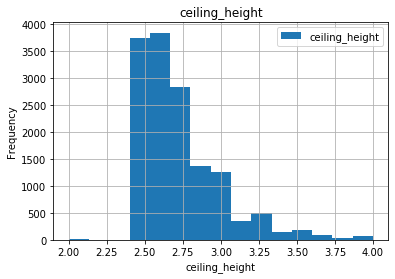

In [1451]:
columns =['total_area', 'last_price', 'rooms', 'ceiling_height']
ranges = [(0, 200), (0, 20000000), (1, 5), (2, 4)]

for i in range(len(columns)):
    ax =df.plot(y=columns[i], kind='hist', title=columns[i], bins=15, range=ranges[i], grid=True)
    ax.set_xlabel(columns[i])
    plt.show()

### Вывод:

По исходным данным получаем, что большинство квартир с площадью от 30 до 70 кв. метров, от 1 до 3х комнат, с потолками около 2.5м. Стомиость квартиры в среднем от 3 000 000 до 5 000 000.

Будем считать редкими квартиры с площадью более 200 кв. метров, имеющих более 5 комнат, потолки более 5 метров и стоимостью более 20 000 000.

### Задача:
### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Отбросим пропущенные значения, который мы заменили на -1.

In [1452]:
data = df.query('days_exposition > 0')

In [1453]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0.5, 0, 'Days exposition')

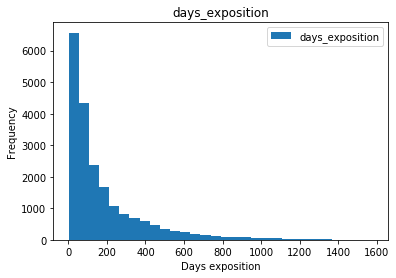

In [1454]:
ax = data.plot(y='days_exposition', kind='hist', bins=30, title='days_exposition')
ax.set_xlabel('Days exposition')

Значения после 800 дней очень редки.

Построим диаграмму размаха.

Text(0, 0.5, 'Frequency')

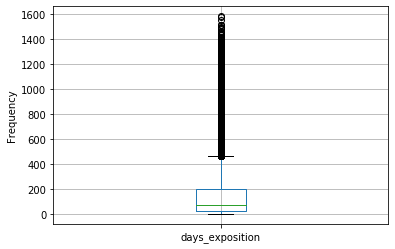

In [1455]:
ax = df.boxplot('days_exposition')
ax.set_ylabel('Frequency')

In [1456]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

### Вывод:

Поличили среднее значение для продажи - 155 дня.
Медиана - 91 день.
Видим, что медиана и среднее сильно различается, что говорит о некотором количестве выбросов.

Из диаграммы размаха можем сделать вывод, что очень быстрая продажа квартиры - продажа менее чем за 44 дня. Очень долгая продажа - более 500 дней.

### Задача:
### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

In [1457]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_metr,weekday,month,year,living_per_total,kitchen_per_total
0,20,13000000,108,2019-03-07,3,2.70,16,51.0,8,NaN,...,482.0,2,755.0,-1,120370.370370,3,3,2019,0.472222,0.231481
1,7,3350000,40,2018-12-04,1,NaN,11,18.6,1,NaN,...,NaN,0,NaN,81,83750.000000,1,12,2018,0.465000,0.275000
2,10,5196000,56,2015-08-20,2,NaN,5,34.3,4,NaN,...,90.0,2,574.0,558,92785.714286,3,8,2015,0.612500,0.148214
3,0,64900000,159,2015-07-24,3,NaN,14,NaN,9,NaN,...,84.0,3,234.0,424,408176.100629,4,7,2015,NaN,NaN
4,2,10000000,100,2018-06-19,2,3.03,14,32.0,13,NaN,...,112.0,1,48.0,121,100000.000000,1,6,2018,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133,2017-03-21,3,3.70,5,73.3,3,NaN,...,796.0,3,381.0,-1,72932.330827,1,3,2017,0.551128,0.103985
23695,14,3100000,59,2018-01-15,3,NaN,5,38.0,4,NaN,...,NaN,0,NaN,45,52542.372881,0,1,2018,0.644068,0.144068
23696,18,2500000,56,2018-02-11,2,NaN,3,29.7,1,NaN,...,NaN,0,NaN,-1,44642.857143,6,2,2018,0.530357,NaN
23697,13,11475000,76,2017-03-28,2,3.00,17,NaN,12,NaN,...,173.0,3,196.0,602,150986.842105,1,3,2017,NaN,0.306579


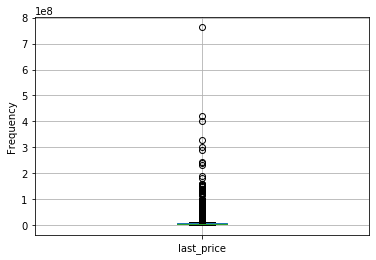

Text(0, 0.5, 'Frequency')

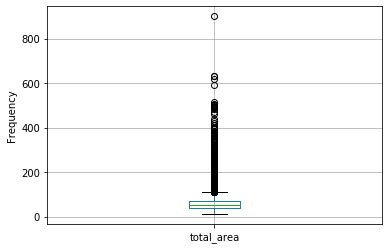

In [1458]:
ax = df.boxplot('last_price')
ax.set_ylabel('Frequency')
plt.show()
ax =df.boxplot('total_area')
ax.set_ylabel('Frequency')

Заметим большое количество редких значений площади и цены.

In [1459]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [1460]:
Q1 = df['last_price'].quantile(0.25)
Q3 = df['last_price'].quantile(0.75)
IQR = Q3 - Q1
df = df.query('last_price > @Q1 - 1.5* @IQR and last_price < @Q3 + 1.5* @IQR')

Q1 = df['total_area'].quantile(0.25)
Q3 = df['total_area'].quantile(0.75)
IQR = Q3 - Q1
df = df.query('total_area > @Q1 - 1.5* @IQR and total_area < @Q3 + 1.5* @IQR')

In [1461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21123 entries, 1 to 23698
Data columns (total 28 columns):
total_images            21123 non-null int64
last_price              21123 non-null int64
total_area              21123 non-null int64
first_day_exposition    21123 non-null datetime64[ns]
rooms                   21123 non-null int64
ceiling_height          12747 non-null float64
floors_total            21123 non-null int64
living_area             19476 non-null float64
floor                   21123 non-null int64
is_apartment            2451 non-null object
studio                  21123 non-null bool
open_plan               21123 non-null bool
kitchen_area            19090 non-null float64
balcony                 21123 non-null int64
locality_name           21082 non-null object
airports_nearest        15685 non-null float64
cityCenters_nearest     21123 non-null int64
parks_around3000        21123 non-null int64
parks_nearest           6475 non-null float64
ponds_around3000   

### Вывод:

Заметим в таблице как просто редкие значения, по типу квартиры с площадью более 600 кв. метров, но при этом стоимость квадратного метра для такой квартиры остается в норме, что говорит о правдоподобности данных, так и аномальные данные. Например, квартиры с потолком 100 и 30 метров.
Также встречаются аномальные низкие параметры, например квартиры с потолком 1 метр либо с 0 комнат или находящиеся в здании с 0 этажей.

### Задача:
### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

#### Изучим зависимость цены от площади, числа комнат и удалённости от центра

Text(0, 0.5, 'Frequency')

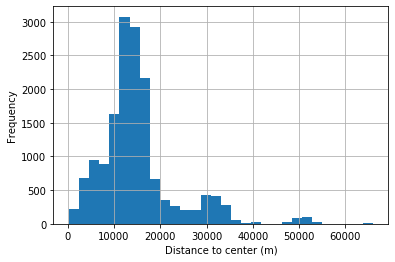

In [1462]:
columns = ['last_price', 'total_area', 'rooms', 'cityCenters_nearest']
ax = df[df['cityCenters_nearest'] > 0]['cityCenters_nearest'].hist(bins=30)
ax.set_xlabel('Distance to center (m)')
ax.set_ylabel('Frequency')

In [1463]:
df[columns].corr()['last_price']

last_price             1.000000
total_area             0.675015
rooms                  0.404567
cityCenters_nearest    0.124289
Name: last_price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bb7528610>,
      dtype=object)

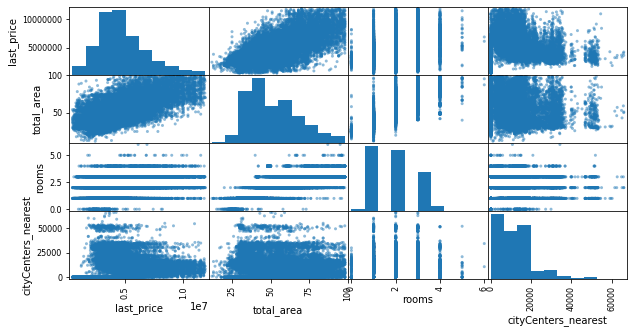

In [1464]:
pd.plotting.scatter_matrix(df[columns], figsize=(10, 5))

Видим сильную положительную корреляцию между ценой площадью.

#### Изучим зависимость цены от расположения от этажа в доме: первый, последний, другой.

Для начала категоризуем данные

In [1465]:
columns = ['last_price', 'floor', 'floors_total']
df[columns].describe()

,last_price,floor,floors_total
count,2.112300e+04,21123.000000,21123.000000
mean,4.736657e+06,5.910666,10.765753
std,2.118198e+06,4.914015,6.662061
min,4.300000e+05,1.000000,-1.000000
25%,3.300000e+06,2.000000,5.000000
50%,4.350000e+06,4.000000,9.000000
75%,5.881192e+06,8.000000,16.000000
max,1.189440e+07,31.000000,60.000000


Отбросим некорректные значения в столбце *floors_total*

Категоризуем этажи как первый, последний и другой.

In [1466]:
df['floor_cat'] = df['floor']
df['floor_cat'] = df['floor_cat'].where(df['floor_cat']!=1, 'первый')
df['floor_cat'] = df['floor_cat'].where((df['floor_cat']!=df['floors_total']), 'последний')
df['floor_cat'] = (df['floor_cat']
                        .where((df['floor_cat']=='первый') | (df['floor_cat']=='последний'), 'другой'))

Построим сводную таблицу и посмотрим на такие параметры как среднее и медиана

In [1467]:
df_floor_table = pd.pivot_table(df, index='floor_cat', values='last_price', aggfunc={'mean', 'median'})
df_floor_table

,mean,median
floor_cat,,
другой,4.934622e+06,4500000.0
первый,4.041970e+06,3800000.0
последний,4.338552e+06,3990000.0


Можем заметить, что квартиры на первом этаже дешевле остальных, при этом квартиры на последнем этаже не являются самыми дорогими. В среднем самые дорогие квартиры находятся в промежутке между первым и последним.

#### Изучим зависимость цены от года, месяца и дня недели публикации объявления.

In [1468]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'cost_per_metr', 'weekday', 'month',
       'year', 'living_per_total', 'kitchen_per_total', 'floor_cat'],
      dtype='object')

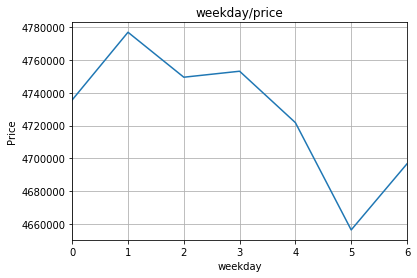

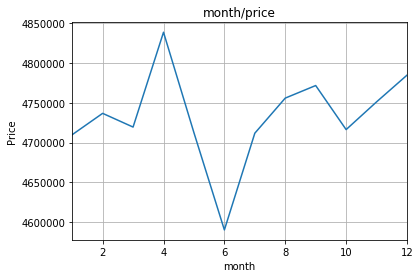

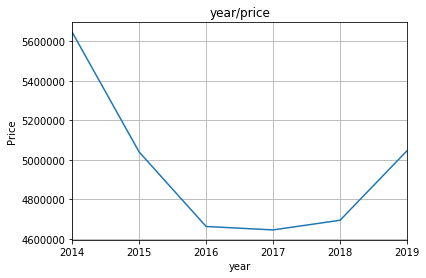

In [1469]:
columns = ['weekday', 'month', 'year']
titles = ['weekday/price', 'month/price', 'year/price']

for i in range(len(columns)):
    ax = df.groupby(columns[i]).mean()['last_price'].plot(title=titles[i], grid=True)
    ax.set_xlabel(columns[i])
    ax.set_ylabel('Price')
    plt.show()

Видим, что самые дешёвые предложения были в 2016-2017 годах, при этом с середины 2017 цены начали расти.
Также наблюдаем минимум цен в 6 месяце, то есть в июне. Объявления выложенные в начале недели имеют большую цену, чем в конце недели.

### Вывод:

### Задача:
### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [1470]:
locality_table = (pd
                  .pivot_table(df, index='locality_name', values='cost_per_metr', aggfunc={'count', 'mean'})
                  .sort_values('count', ascending=False)
                  .head(10)
                 )
locality_table.sort_values('mean')

,count,mean
locality_name,,
Выборг,222,58424.160088
Всеволожск,389,67440.370707
Гатчина,300,68985.393797
Колпино,331,75689.540097
посёлок Шушары,431,79184.298270
посёлок Мурино,522,86379.968978
посёлок Парголово,324,90998.620329
деревня Кудрово,297,92920.707278
Пушкин,334,101004.460362


### Вывод:

Среди городов с наибальшим числом объявлений наименьшая стоимость жилья в Выборге - 58 000 за кв. метр. Самое дорогое жилье в Санкт-Петербурге - 106 000 за кв. метр

### Задача:
### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [1471]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'cost_per_metr', 'weekday', 'month',
       'year', 'living_per_total', 'kitchen_per_total', 'floor_cat'],
      dtype='object')

In [1472]:
df_distance_spb = df.query('locality_name=="Санкт-Петербург"')
df_distance_spb['cityCenters_nearest'].describe()

count    13337.000000
mean     12321.675639
std       4533.448574
min         -1.000000
25%       9888.000000
50%      12790.000000
75%      15208.000000
max      29493.000000
Name: cityCenters_nearest, dtype: float64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


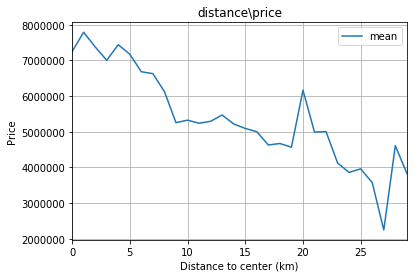

In [1473]:
df_distance_spb['cityCenters_nearest_km'] = (df_distance_spb['cityCenters_nearest'] / 1000).astype('int64')

ax = (df_distance_spb
 .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc={'mean', 'count'})
 .sort_values('cityCenters_nearest_km')
 .plot(y='mean', title='distance\price', grid=True)
)
ax.set_xlabel('Distance to center (km)')
ax.set_ylabel('Price')

df['cityCenters_nearest_km'] = df_distance_spb['cityCenters_nearest_km']

### Вывод:

Обозначим область центра в 4 км. Т.к. После этого расстояния стоимость жилья начинает резко падать.
Второй пик резкого падения после 20 км, эту зону будем считать окраиной.

### Задача:
### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [1474]:
columns=['last_price', 'total_area', 'rooms', 'ceiling_height']
df_center_spb = df.query('cityCenters_nearest_km <= 4 and locality_name=="Санкт-Петербург"')
df_spb = df.query('locality_name=="Санкт-Петербург"')

In [1475]:
df_center_spb[columns].describe()

,last_price,total_area,rooms,ceiling_height
count,1.166000e+03,1166.000000,1166.000000,737.000000
mean,7.337021e+06,63.428816,2.285592,3.154098
std,2.057739e+06,18.668502,0.919926,1.426903
min,1.600000e+06,12.000000,0.000000,2.400000
25%,5.850000e+06,49.000000,2.000000,2.820000
50%,7.293500e+06,64.000000,2.000000,3.000000
75%,8.761250e+06,77.000000,3.000000,3.250000
max,1.180000e+07,98.000000,5.000000,32.000000


In [1476]:
df_spb[columns].describe()

,last_price,total_area,rooms,ceiling_height
count,1.333700e+04,13337.000000,13337.000000,8473.000000
mean,5.543758e+06,52.729249,1.918572,2.738830
std,1.988267e+06,16.887240,0.875137,0.918816
min,1.190000e+06,12.000000,0.000000,1.000000
25%,4.000000e+06,40.000000,1.000000,2.510000
50%,5.095000e+06,50.000000,2.000000,2.650000
75%,6.698000e+06,64.000000,3.000000,2.800000
max,1.189440e+07,98.000000,6.000000,32.000000


### Вывод:

Видим, что предложения в центре по всем параметрам превосходят предложения в общем. А именно: средняя стоимость жилья более чем в в 1.5 раза выше, средняя площадь квартир в городе 53кв против 75 в центре. Среднее число комнат в центре - 3, в общем - 2 комнаты. Высота потолка в центре также выше, 3.1 метра вместо 2.6.

Общий вывод можем сделать следующий:
Квартиры в центре просторнее и дороже

#### Изучим влияние на стоимость таких факторов как: число комнат, этаж, удалённость от центра и дата размещения.

#### Рассмотрим влияние числа комнат на стоимость

In [1477]:
columns = ['last_price', 'rooms', 'floor_cat', 'cityCenters_nearest', 'weekday', 'year', 'month']
df_center_spb_price = df.query('cityCenters_nearest_km <= 4 and locality_name=="Санкт-Петербург"')
df_spb_price = df.query('locality_name=="Санкт-Петербург"')

df_outskirts_spb = df.query('cityCenters_nearest_km >= 20 and locality_name=="Санкт-Петербург"')

Text(0, 0.5, 'Price')

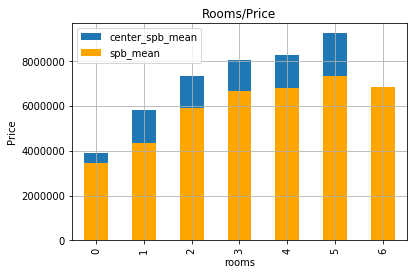

In [1478]:
table1 = (df_center_spb_price
         .pivot_table(index='rooms', values='last_price', aggfunc={'mean'})
        )
table1.columns = ['center_spb_mean']
ax = table1.plot(y='center_spb_mean', kind='bar', title='Rooms/Price')

table2 = (df_spb_price
     .pivot_table(index='rooms', values='last_price', aggfunc={'mean'})
         )
table2.columns = ['spb_mean']
ax= table2.plot(y='spb_mean', kind='bar', title='Rooms/Price', ax = ax, color='orange', grid=True)
ax.set_ylabel('Price')

Заметим, что в центре нет предложений по 6 комнатным квартирам.
В целом в центре можем заметить более выраженную зависимость стоимости от числа комнат.

Рассмотрим дополнительно квартиры в центре и окраине. Ранее мы обозначили окраину как зона далее чем 20 км от центра.

Text(0, 0.5, 'Price')

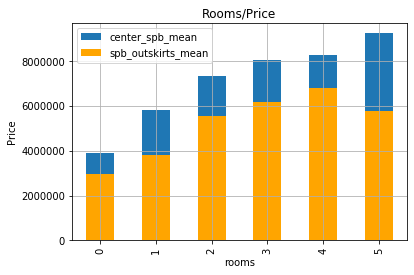

In [1479]:
table1 = (df_center_spb_price
         .pivot_table(index='rooms', values='last_price', aggfunc={'mean'})
        )
table1.columns = ['center_spb_mean']
ax = table1.plot(y='center_spb_mean', kind='bar', title='Rooms/Price')

table2 = (df_outskirts_spb
     .pivot_table(index='rooms', values='last_price', aggfunc={'mean'})
         )
table2.columns = ['spb_outskirts_mean']
ax =table2.plot(y='spb_outskirts_mean', kind='bar', title='Rooms/Price', ax = ax, color='orange', grid=True)
ax.set_ylabel('Price')

Заметим, что цена 5ти комнатной квартиры на окраине ниже чем для 4х комнатной. В центре тенденция роста цены сохраняется.

#### Рассмотрим влияние этажа на стоимость

In [1480]:
df_center_spb_price.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'cost_per_metr', 'weekday', 'month',
       'year', 'living_per_total', 'kitchen_per_total', 'floor_cat',
       'cityCenters_nearest_km'],
      dtype='object')

Text(0, 0.5, 'Price')

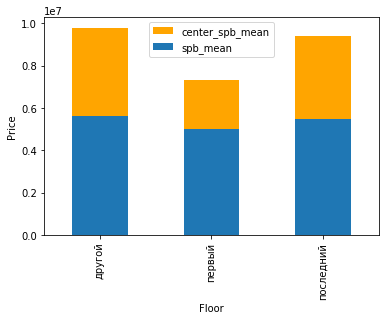

In [1481]:
table = (df_centre_spb_price
 .pivot_table(index='floor_cat', values='last_price', aggfunc={'mean'})
)
table.columns = ['center_spb_mean']
ax = table.plot(kind='bar', color='orange')

axx = (df_spb_price
 .pivot_table(index='floor_cat', values='last_price', aggfunc={'mean'})
)
axx.columns = ['spb_mean']
ax = axx.plot(kind='bar', ax=ax)
ax.set_xlabel('Floor')
ax.set_ylabel('Price')

### Вывод:

По построенному графику видим, что в центре города квартиры на первом этаже много дешевле относительно квартир на других этажах, в отличие от города в целом, где ситуация более равномерная.

#### Рассмотрим зависимость цены от удалённости от центра

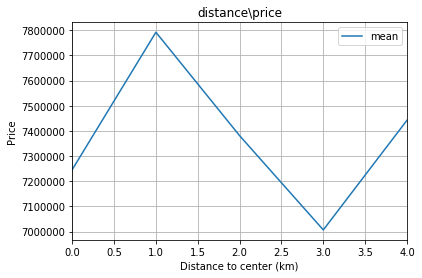

Text(0, 0.5, 'Price')

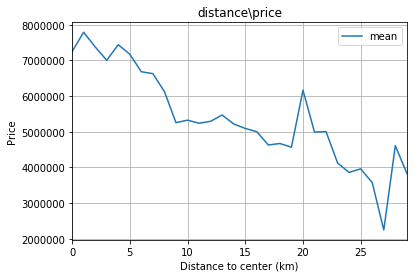

In [1482]:
ax = (df_center_spb_price
 .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc={'mean', 'count'})
 .sort_values('cityCenters_nearest_km')
 .plot(y='mean', title='distance\price', grid=True)
)
ax.set_xlabel('Distance to center (km)')
ax.set_ylabel('Price')
plt.show()

ax = (df_spb_price
 .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc={'mean', 'count'})
 .sort_values('cityCenters_nearest_km')
 .plot(y='mean', title='distance\price', grid=True)
)
ax.set_xlabel('Distance to center (km)')
ax.set_ylabel('Price')

В центре наблюдаем более равномерную ситуацию, в то время как во всем городе стоимость стремительно падает при удалении от центра.

Рассмотрим дополнительнно ситуацию на окраине.

Text(0, 0.5, 'Price')

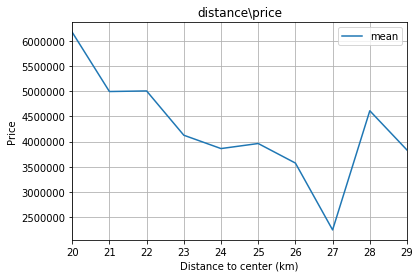

In [1483]:
ax = (df_outskirts_spb
 .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc={'mean', 'count'})
 .sort_values('cityCenters_nearest_km')
 .plot(y='mean', title='distance\price', grid=True)
)
ax.set_xlabel('Distance to center (km)')
ax.set_ylabel('Price')

Заметим, что цена на окриане также резко падает как и в городе в общем. Отметим резкий подъём на 28 км.

#### Рассмотри влияние даты объявления на стоимость

In [1484]:
columns =['year', 'month', 'weekday']
titles=['year/price', 'month/price', 'weekday/price']

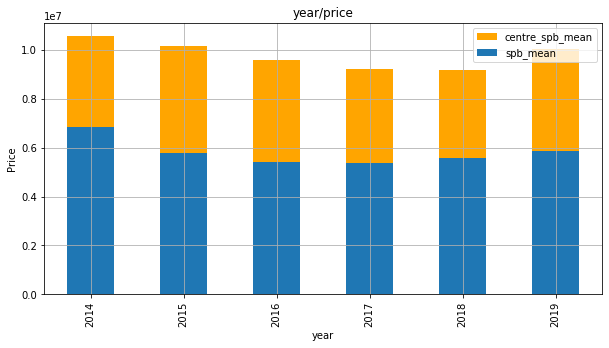

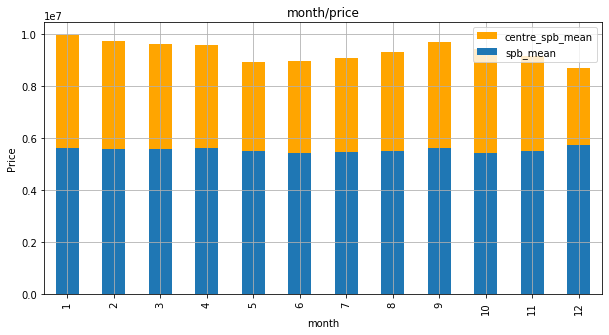

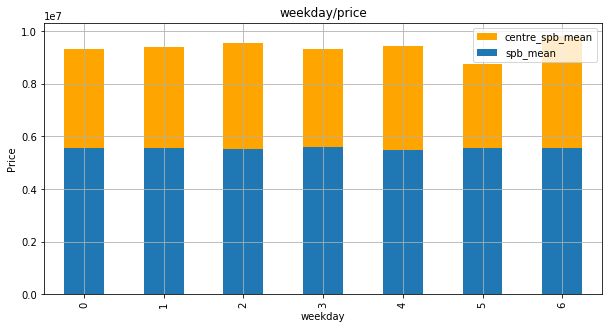

In [1485]:
for i in range(len(columns)):
    table = (df_centre_spb_price
     .pivot_table(index=columns[i], values='last_price', aggfunc={'mean'})
    )
    table.columns = ['centre_spb_mean']
    ax = table.plot(kind='bar', color='orange', grid=True, figsize=(10, 5))

    axx = (df_spb_price
     .pivot_table(index=columns[i], values='last_price', aggfunc={'mean'})
    )
    axx.columns = ['spb_mean']
    ax = axx.plot(kind='bar', ax=ax, grid=True, figsize=(10, 5), title = titles[i])
    ax.set_xlabel(columns[i])
    ax.set_ylabel('Price')
    plt.show()

Обратим внимание на зависимость цены от года публикации объявления, а именно в 2015 году была сильная просадка в цене по городу вообще, но в центре цена снизилась не так резко. Также заметим, что в центре под конец года после сентября стоимость квартир стабильно падает, однако в городе вообще такой ситуации не наблюдается.

Общая картина показывает схожесть поведения квартир в центре и в городе в целом.

#### Дополнительно сравним гистограммы для центра города и окраины.

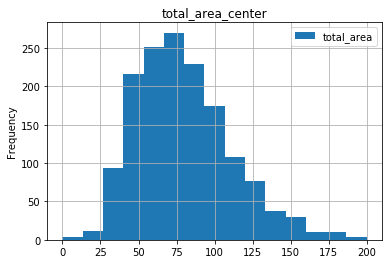

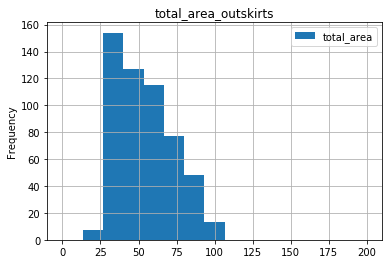

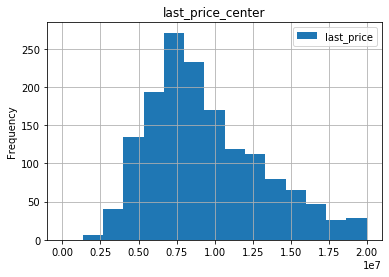

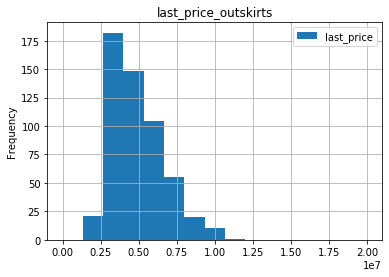

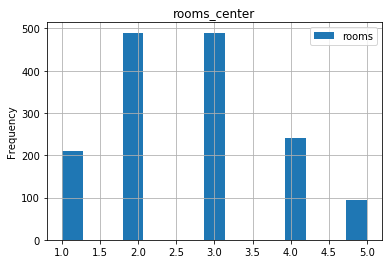

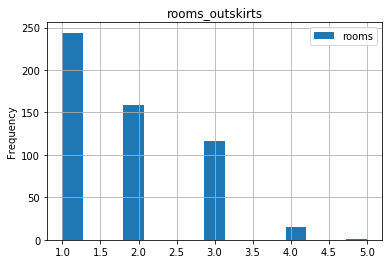

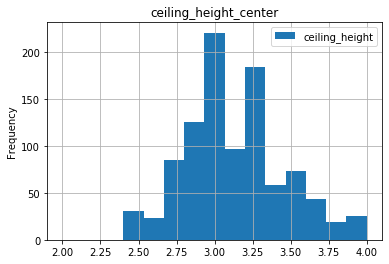

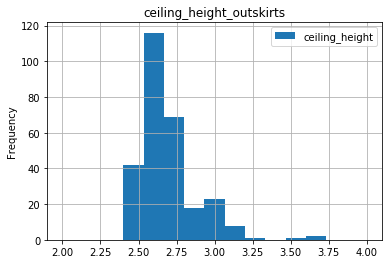

In [1486]:
columns =['total_area', 'last_price', 'rooms', 'ceiling_height']
titles1=['total_area_center', 'last_price_center', 'rooms_center', 'ceiling_height_center']
titles2=['total_area_outskirts', 'last_price_outskirts', 'rooms_outskirts', 'ceiling_height_outskirts']
ranges = [(0, 200), (0, 20000000), (1, 5), (2, 4)]

for i in range(len(columns)):
    ax = df_centre_spb.plot(y=columns[i], kind='hist', title=titles1[i], bins=15, range=ranges[i], grid=True)
    plt.show()
    df_outskirts_spb.plot(y=columns[i], kind='hist', title=titles2[i], bins=15, range=ranges[i], grid=True)
    plt.show()

Видим, что для окраины все пики смещены влево, то есть средняя площадь меньше - 75кв.м. против 35 кв.м., цена ниже, высота потолков ниже.

### Вывод:.

Видим, что предложения в центре по всем параметрам превосходят предложения в общем. А именно: средняя стоимость жилья более чем в в 1.5 раза выше, средняя площадь квартир в городе 53кв против 75 в центре. Среднее число комнат в центре - 3, в общем - 2 комнаты. Высота потолка в центре также выше, 3.1 метра вместо 2.6.

Общий вывод можем сделать следующий:
Квартиры в центре просторнее и дороже

Обнаружили, что в центре почти нет предложений по 5ти комнатным квартирам дешевле 7 500 000, в отличие от города в целом. Аналогично для 4 комнатных дешевле 5 000 000. Однако предложения по 1 комнатным квартирам схожи.
В целом в центре можем заметить более выраженную зависимость стоимости от числа комнат.

В центре города квартиры на первом этаже много дешевле относительно квартир на других этажах, в отличие от города в целом, где ситуация более равномерная.

В 2015 году была сильная просадка в цене по городу вообще, но в центре цена снизилась не так резко. Также заметим, что в центре под конец года после сентября стоимость квартир стабильно падает, однако в городе вообще такой ситуации не наблюдается.

### Шаг 5. Общий вывод

По исходным данным получили, что большинство квартир с площадью от 30 до 75 кв. метров, от 1 до 3х комнат, с потолками около 2.5м. Стомиость квартиры в среднем от 3 000 000 до 5 000 000.

Будем считать редкими квартиры с площадью более 200 кв. метров, имеющих более 5 комнат, потолки более 5 метров и стоимостью более 20 000 000.

В среднем продажа квартиры занимает 91 день.

Из диаграммы размаха сделали вывод, что быстрая продажа квартиры - продажа менее чем за 44 дня. Долгая продажа - более 500 дней.

Заметим в таблице как просто редкие значения, по типу квартиры с площадью более 600 кв. метров, но при этом стоимость квадратного метра для такой квартиры остается в норме, что говорит о правдоподобности данных, так и аномальные данные. Например, квартиры с потолком 100 и 30 метров.
Также встречаются аномальные низкие параметры, например квартиры с потолком 1 метр либо с 0 комнат или находящиеся в здании с 0 этажей.

Обнаружили сильную положительную корреляцию между ценой и площадью.

Квартиры на первом этаже дешевле остальных, при этом квартиры на последнем этаже не являются самыми дорогими. В среднем самые дорогие квартиры находятся в промежутке между первым и последним.

Самые дешёвые предложения были в 2016-2017 годах, при этом с середины 2017 цены начали расти.
Также наблюдаем минимум цен в 6 месяце, то есть в июне. Объявления выложенные в начале недели имеют большую цену, чем в конце недели.

Среди городов с наибальшим числом объявлений наименьшая стоимость жилья в Выборге - 58 293 за кв. метр. Самое дорогое жилье в Санкт-Петербурге - 108 561 за кв. метр

Обозначим область центра в 4 км. Т.к. После этого расстояния стоимость жилья начинает резко падать.

Видим, что предложения в центре по всем параметрам превосходят предложения в общем. А именно: средняя стоимость жилья более чем в в 1.5 раза выше, средняя площадь квартир в городе 53кв против 75 в центре. Среднее число комнат в центре - 3, в общем - 2 комнаты. Высота потолка в центре также выше, 3.1 метра вместо 2.6. Общий вывод можем сделать следующий:
Квартиры в центре просторнее и дороже

Обнаружили, что в центре почти нет предложений по 5ти комнатным квартирам дешевле 7 500 000, в отличие от города в целом. Аналогично для 4 комнатных дешевле 5 000 000. Однако предложения по 1 комнатным квартирам схожи.
В целом в центре можем заметить более выраженную зависимость стоимости от числа комнат.

В центре города квартиры на первом этаже много дешевле относительно квартир на других этажах, в отличие от города в целом, где ситуация более равномерна.

После 2015 года была сильная просадка в цене по городу вообще, но в центре цена снизилась не так резко. Также заметим, что в центре под конец года после сентября стоимость квартир стабильно падает, однако в городе вообще такой ситуации не наблюдается.